# Problem Statement
https://www.kaggle.com/c/dogs-vs-cats/data

There are two zipped files - one for training and one for testing. The training contains images of cat or dog - the files are named accordingly. With the purpose of model building the files in the training have been distributed into directories - training and validation with 70/30 splits by count.   

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

import skimage as ski
import skimage.io


from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, InputLayer
from tensorflow.keras.models import Sequential

tf.debugging.set_log_device_placement(True)


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
if tf.test.is_built_with_gpu_support():
    gpus = tf.config.experimental.list_logical_devices('GPU')
    print(gpus)
else:
    print("GPU support is not ebabled")

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [6]:
data_home = "/home/ec2-user/dogs-vs-cats/"

In [7]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = data_home + "/prep/"
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.30
# copy training dataset images into subdirectories
src_directory = data_home + '/train'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)
        

```
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
# define location of dataset
folder = data_home + '/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save(data_home + '/dogs_vs_cats_photos.npy', photos)
save(data_home + '/dogs_vs_cats_labels.npy', labels)

```

In [8]:
files = os.listdir(data_home + "/train")
files[:5]

['cat.8757.jpg',
 'cat.4322.jpg',
 'dog.6172.jpg',
 'cat.5998.jpg',
 'dog.3088.jpg']

In [9]:
y = np.array([1 if "cat" in path else 0 for path in files])
pd.Series(y).value_counts()

1    12500
0    12500
dtype: int64

dog.75.jpg


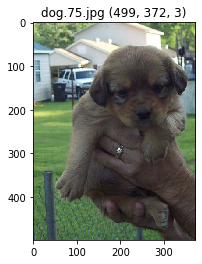

In [10]:
path = files[100]
print(path)
img = ski.io.imread(data_home + "/train/" + path)
plt.imshow(img)
plt.title(path +" " + str(img.shape));

In [11]:
paths = np.array([data_home + "/train/" + f for f in files])
paths[:5]

array(['/home/ec2-user/dogs-vs-cats//train/cat.8757.jpg',
       '/home/ec2-user/dogs-vs-cats//train/cat.4322.jpg',
       '/home/ec2-user/dogs-vs-cats//train/dog.6172.jpg',
       '/home/ec2-user/dogs-vs-cats//train/cat.5998.jpg',
       '/home/ec2-user/dogs-vs-cats//train/dog.3088.jpg'], dtype='<U48')

In [15]:
sizes = set()
for i, fname in enumerate(paths[:100]):
    img = ski.io.imread(fname)
    sizes.add(img.shape)
sizes

{(90, 119, 3),
 (119, 125, 3),
 (122, 165, 3),
 (150, 189, 3),
 (161, 162, 3),
 (179, 200, 3),
 (180, 154, 3),
 (184, 199, 3),
 (200, 191, 3),
 (200, 199, 3),
 (209, 313, 3),
 (212, 320, 3),
 (225, 239, 3),
 (239, 320, 3),
 (240, 179, 3),
 (240, 319, 3),
 (253, 226, 3),
 (261, 350, 3),
 (266, 400, 3),
 (269, 360, 3),
 (270, 246, 3),
 (274, 302, 3),
 (299, 400, 3),
 (300, 248, 3),
 (300, 309, 3),
 (300, 400, 3),
 (307, 239, 3),
 (311, 249, 3),
 (312, 313, 3),
 (313, 458, 3),
 (325, 349, 3),
 (325, 350, 3),
 (332, 500, 3),
 (333, 499, 3),
 (334, 350, 3),
 (334, 500, 3),
 (336, 346, 3),
 (336, 425, 3),
 (341, 368, 3),
 (343, 416, 3),
 (344, 258, 3),
 (360, 407, 3),
 (360, 500, 3),
 (364, 499, 3),
 (374, 500, 3),
 (375, 499, 3),
 (377, 499, 3),
 (382, 500, 3),
 (399, 500, 3),
 (402, 500, 3),
 (403, 500, 3),
 (407, 500, 3),
 (412, 380, 3),
 (413, 500, 3),
 (414, 500, 3),
 (455, 499, 3),
 (460, 499, 3),
 (462, 499, 3),
 (486, 444, 3),
 (499, 298, 3),
 (499, 312, 3),
 (499, 343, 3),
 (499, 34

# Show cat pictures

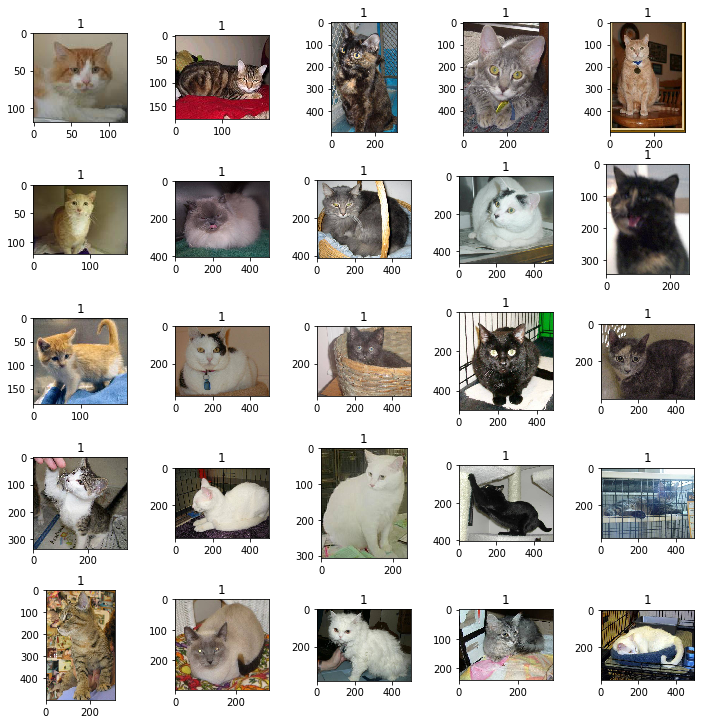

In [17]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))
plt.tight_layout()

for i, ax in enumerate(fig.axes):
    file = paths[y==1][i]
    ax.imshow(ski.io.imread(file))
    ax.set_title(y[y==1][i])

# Show dog pictures

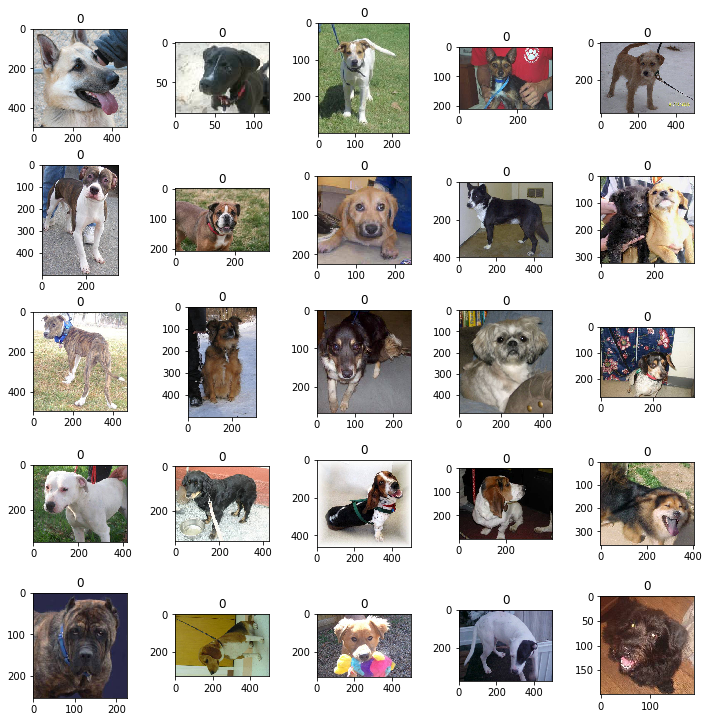

In [18]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))
plt.tight_layout()

for i, ax in enumerate(fig.axes):
    file = paths[y==0][i]
    ax.imshow(ski.io.imread(file))
    ax.set_title(y[y==0][i])

In [19]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), 
                     activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', 
                     input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


# define model
model = define_model()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = datagen.flow_from_directory(data_home + '/prep/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(data_home + '/prep/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))

Found 17495 images belonging to 2 classes.
Found 7505 images belonging to 2 classes.


In [21]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18208114219365720989
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7709907864689968713
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4554690893756769032
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11338085172
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4025998250557427735
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


In [24]:
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Train for 274 steps, validate for 118 steps
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/ta

In [25]:
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('Validation accuracy: %.3f' % (acc * 100.0))

  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Validation accuracy: 57.642


In [26]:
history.history

{'loss': [0.7224395981207],
 'accuracy': [0.54587024],
 'val_loss': [0.6748661156428062],
 'val_accuracy': [0.5764157]}

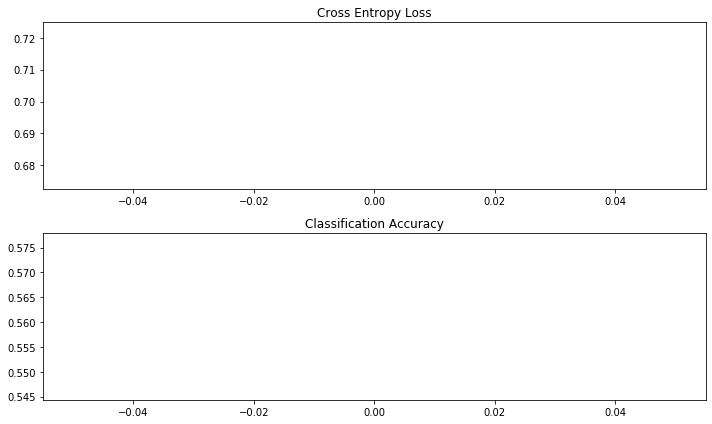

In [27]:
# plot diagnostic learning curves
import matplotlib.pyplot as plt
def summarize_diagnostics(history):
    plt.figure(figsize=(10, 6))
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    
summarize_diagnostics(history)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmnentation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1/255.0,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


train_it = datagen.flow_from_directory(data_home + '/prep/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(data_home + '/prep/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))


Found 17495 images belonging to 2 classes.
Found 7505 images belonging to 2 classes.


- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- shear_range is for randomly applying shearing transformations
- zoom_range is for randomly zooming inside pictures
- horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a - rotation or a width/height shift.

  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train for 274 steps, validate for 118 steps
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/de

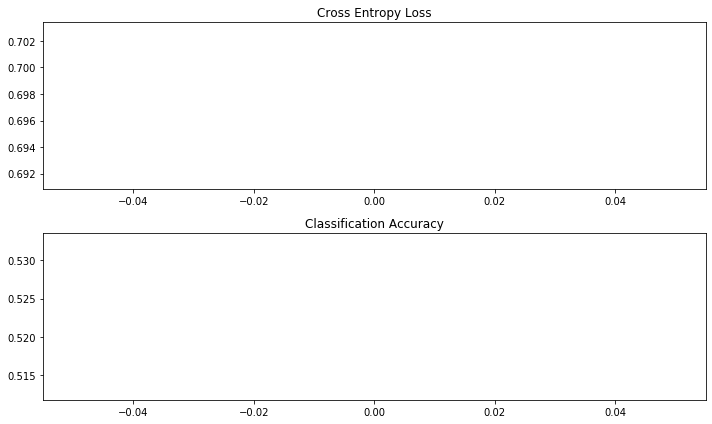

In [29]:
# One block VGG

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu'
                     , kernel_initializer='he_uniform'
                     , padding='same'
                     , input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = define_model()

history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train for 274 steps, validate for 118 

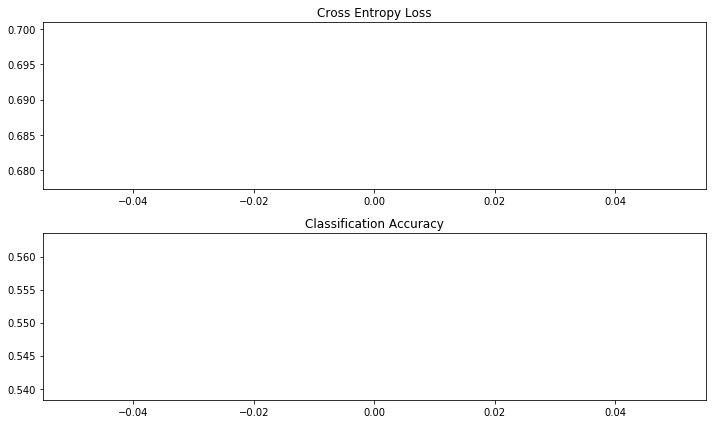

In [30]:
# Two block VGG

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = define_model()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('Validatio accuracy: %.3f' % (acc * 100.0))

summarize_diagnostics(history)


In [ ]:
# Three Block VGG model


def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

model2 = define_model()

history2 = model2.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model2.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history2)


  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
  ...
    to  
  ['...']
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train for 274 steps, validate for 118 steps
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/de

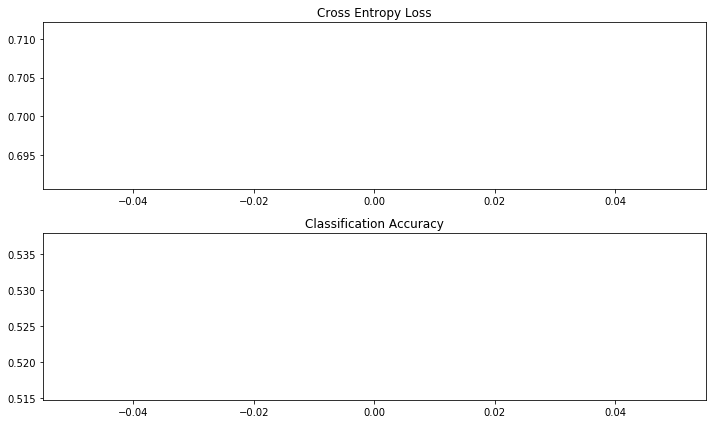

In [32]:
# 4 block VGG model 

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = define_model()

history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=50, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)

# Define a model using pretrained VGG16 model

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


model = define_model()


# Image augmnentation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1/255.0,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


train_it = datagen.flow_from_directory(data_home + '/prep/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory(data_home + '/prep/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))



history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=50, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

NameError: name 'summarize_diagnostics' is not defined

In [14]:
model.save('final_model.h5')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0


In [3]:
!ls -lh

total 898M
drwxrwxr-x 26 ec2-user ec2-user 4.0K Sep 12 00:36 anaconda3
drwxrwxr-x  4 ec2-user ec2-user 4.0K Oct  6 07:30 dogs-vs-cats
-rw-r--r--  1 ec2-user ec2-user 813M Oct  6 06:18 dogs-vs-cats.zip
drwxrwxr-x 10 ec2-user ec2-user 4.0K Sep 12 00:26 examples
-rw-rw-r--  1 ec2-user ec2-user  81M Oct  6 20:37 final_model.h5
-rw-rw-r--  1 ec2-user ec2-user 1.5M Oct  6 20:38 Keras 10 - Cat vs Dog.ipynb
-rw-rw-r--  1 ec2-user ec2-user  26K Aug 19 00:03 LICENSE
-rw-------  1 ec2-user ec2-user  73K Oct  6 20:40 nohup.out
-rw-rw-r--  1 ec2-user ec2-user 2.8M Sep 11 22:12 Nvidia_Cloud_EULA.pdf
-rw-rw-r--  1 ec2-user ec2-user 3.7K Sep 12 02:35 README
-rw-rw-r--  1 ec2-user ec2-user  87K Dec 11  2019 sampleSubmission.csv
drwxrwxr-x  4 ec2-user ec2-user 4.0K Sep 11 22:36 src
drwxrwxr-x  3 ec2-user ec2-user 4.0K Sep 11 22:12 tools
drwxrwxr-x  5 ec2-user ec2-user 4.0K Sep 12 00:26 tutorials
-rw-rw-r--  1 ec2-user ec2-user  597 Oct  6 07:23 Untitled.ipynb


In [5]:
!curl -O https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg -o sample_image.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  224k  100  224k    0     0  1987k      0 --:--:-- --:--:-- --:--:-- 1987k


In [9]:
!ls -l 

total 919032
drwxrwxr-x 26 ec2-user ec2-user      4096 Sep 12 00:36 anaconda3
drwxrwxr-x  4 ec2-user ec2-user      4096 Oct  6 07:30 dogs-vs-cats
-rw-r--r--  1 ec2-user ec2-user 851576689 Oct  6 06:18 dogs-vs-cats.zip
drwxrwxr-x 10 ec2-user ec2-user      4096 Sep 12 00:26 examples
-rw-rw-r--  1 ec2-user ec2-user  84636944 Oct  6 20:37 final_model.h5
-rw-rw-r--  1 ec2-user ec2-user   1553330 Oct  7 07:16 Keras 10 - Cat vs Dog.ipynb
-rw-rw-r--  1 ec2-user ec2-user     25646 Aug 19 00:03 LICENSE
-rw-------  1 ec2-user ec2-user     74215 Oct  6 20:40 nohup.out
-rw-rw-r--  1 ec2-user ec2-user   2839191 Sep 11 22:12 Nvidia_Cloud_EULA.pdf
-rw-rw-r--  1 ec2-user ec2-user      3741 Sep 12 02:35 README
-rw-rw-r--  1 ec2-user ec2-user    229955 Oct  7 07:15 sample_image.jpj
-rw-rw-r--  1 ec2-user ec2-user     88903 Dec 11  2019 sampleSubmission.csv
drwxrwxr-x  4 ec2-user ec2-user      4096 Sep 11 22:36 src
drwxrwxr-x  3 ec2-user ec2-user      4096 Sep 11 22:12 tools
drwxrwxr-x  5 ec2-user ec2-use

In [10]:
!mv sample_image.jpj sample_image.jpg

In [16]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    #img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example(file_name):
    # load the image
    img = load_image(file_name)
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example("sample_image.jpg")


Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_2686 in device /job:localhost/replica:0/task:0/device:CPU:0
[1.]


In [13]:
!curl -O https://static.scientificamerican.com/sciam/cache/file/32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1734k  100 1734k    0     0  5981k      0 --:--:-- --:--:-- --:--:-- 5981k


In [14]:
!ls -l

total 920772
-rw-rw-r--  1 ec2-user ec2-user   1776307 Oct  7 07:18 32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg
drwxrwxr-x 26 ec2-user ec2-user      4096 Sep 12 00:36 anaconda3
drwxrwxr-x  4 ec2-user ec2-user      4096 Oct  6 07:30 dogs-vs-cats
-rw-r--r--  1 ec2-user ec2-user 851576689 Oct  6 06:18 dogs-vs-cats.zip
drwxrwxr-x 10 ec2-user ec2-user      4096 Sep 12 00:26 examples
-rw-rw-r--  1 ec2-user ec2-user  84636944 Oct  6 20:37 final_model.h5
-rw-rw-r--  1 ec2-user ec2-user   1558714 Oct  7 07:18 Keras 10 - Cat vs Dog.ipynb
-rw-rw-r--  1 ec2-user ec2-user     25646 Aug 19 00:03 LICENSE
-rw-------  1 ec2-user ec2-user     74215 Oct  6 20:40 nohup.out
-rw-rw-r--  1 ec2-user ec2-user   2839191 Sep 11 22:12 Nvidia_Cloud_EULA.pdf
-rw-rw-r--  1 ec2-user ec2-user      3741 Sep 12 02:35 README
-rw-rw-r--  1 ec2-user ec2-user    229955 Oct  7 07:15 sample_image.jpg
-rw-rw-r--  1 ec2-user ec2-user     88903 Dec 11  2019 sampleSubmission.csv
drwxrwxr-x  4 ec2-user ec2-user      4096 Sep 11

In [17]:
run_example("32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg")

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_4028 in device /job:localhost/replica:0/task:0/device:CPU:0
[0.]
